# Stage 2 Consolidation as a function of time

This code is produced on python, by group 14. Hdr=7.72m

**Importing useful packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Set variables to their calculated values, all determined in Section 3**

In [2]:
de=1.356
F=2.728
Hdr=7.72
Ch=0.0272 #m^2/week
Cv=0.0108864 #m^2/week
s=0

**Defining a function to calculate Uv (vertical consolidation)**

In [3]:
def U_vertical(Tv, s):
    
    for m in range(0,10**4):
        q=(2/((np.pi/2)*(2*m+1))**2*np.exp(-((np.pi/2)*(2*m+1))**2*Tv))
        s+=q
           
    Uv=1-s
    s=0
    q=0
    return Uv

**Sizing the lists**

In [4]:
t_values=[]
U_values=[]

**Looping through all the time values (in weeks) and determing the consolidation associated**

This code calculates U, from U=1-(1-Uv)(1-Uh). Uh is determined on time, and the design of the pre-fabricated vertical drains. Uv is also a function of time.

In [5]:
for t in range(1,52):
    Tv=Cv*t/Hdr**2
    Uv=U_vertical(Tv, s)
    
    Th=Ch*t/de**2
    Uh=1-np.exp(-8*Th/F)
    
    U=1-(1-Uv)*(1-Uh)
    
    t_values.append(t)
    U_values.append(U)

Results=pd.DataFrame({'t value': t_values, 'U value': U_values})

In [6]:
print(Results)

    t value   U value
0         1  0.057056
1         2  0.102879
2         3  0.145220
3         4  0.184943
4         5  0.222443
5         6  0.257962
6         7  0.291673
7         8  0.323712
8         9  0.354194
9        10  0.383214
10       11  0.410859
11       12  0.437206
12       13  0.462326
13       14  0.486283
14       15  0.509136
15       16  0.530943
16       17  0.551754
17       18  0.571618
18       19  0.590582
19       20  0.608688
20       21  0.625978
21       22  0.642489
22       23  0.658259
23       24  0.673323
24       25  0.687712
25       26  0.701459
26       27  0.714592
27       28  0.727140
28       29  0.739129
29       30  0.750586
30       31  0.761534
31       32  0.771997
32       33  0.781996
33       34  0.791552
34       35  0.800686
35       36  0.809416
36       37  0.817761
37       38  0.825737
38       39  0.833361
39       40  0.840649
40       41  0.847617
41       42  0.854277
42       43  0.860645
43       44  0.866732
44       4

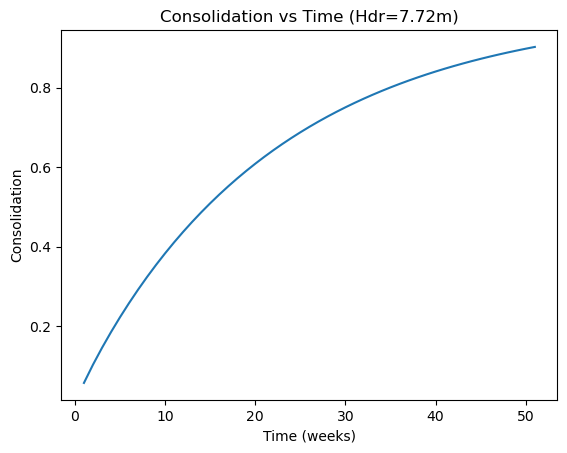

In [8]:
plt.plot(t_values, U_values)

plt.xlabel('Time (weeks)')
plt.ylabel('Consolidation')
plt.title('Consolidation vs Time (Hdr=7.72m)')

plt.show()